In [1]:
import twitter
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import collections

In [2]:
api = twitter.Api(consumer_key="vSsCY8ZdyOKqI2nBVpLElBKDD",
                  consumer_secret="xHWGtoCllCtc7lb5GkCAhJVU4q7TGN8TBtZZOEFqK1Rez8LQ1t",
                  access_token_key="806043476831809537-F2GoVNl8ngMXD0z0fdsvCSJXxolZhiY",
                  access_token_secret="aupIcZVfqSx9xyWYaa2Kyu7PJmfnpdah8G0Urgjwtz1U1"                  
                  )
api.sleep_on_rate_limit = True

In [3]:
def getUserFromName(name, api):
    user_list = api.GetUsersSearch(term=name, page=1, count=1)
    if user_list:
        user = user_list[0]
        if user.verified:
            return user
    return None

In [4]:
getUserFromName('Lionel Messi', api)

User(ID=2917808716, ScreenName=fundacionmessi)

In [4]:
queries = ["Luis Suarez", "Sergio Busquets", "Iker Casillas", "Malena Ortiz Cruz", "Diego Lopez",
           "Isabel Garzo", "Marc ter Stegan", "Samuel Umtiti", "Andres Iniesta", "Arturo Vidal",
           "Jordi Alba", "Sergi Roberto", "Rafa Nadal", "Roger Federer", "Gerard Pique",
           "Antoine Griezmann", "marie portolano"]

In [52]:
V = []
# For now saving all kinds of graphs... may need only one later
g = nx.Graph()
dg = nx.DiGraph()
id_to_name = {}
for i in range(len(queries)):
    user = getUserFromName(queries[i], api)
    if user:
        # row = [repr(user.id), user.name, user.screen_name]
        id_to_name[user.id] = user.name
        g.add_node(user.name, id=repr(user.id), screen_name=user.screen_name)
        dg.add_node(user.name, id=repr(user.id), screen_name=user.screen_name)

In [58]:
for query_name in queries:

    if not g.has_node(query_name):
        continue

    query_id = g.nodes[query_name]['id']
    friendIDs = api.GetFriendIDs(query_id)
    for friendID in friendIDs:
        if friendID in id_to_name.keys():
            friend_name = id_to_name[friendID]
            print(f'{query_name} is following {friend_name}')
            dg.add_edge(query_name, friend_name)

            # 2 nodes in an undirected graph are connected if they both follow each other
            if dg.has_edge(friend_name, query_name):
                g.add_edge(friend_name, query_name)

Luis Suarez is following Sergio Busquets
Luis Suarez is following Iker Casillas
Luis Suarez is following Sergi Roberto
Luis Suarez is following Jordi Alba
Luis Suarez is following Gerard Piqué
Luis Suarez is following Andrés Iniesta
Sergio Busquets is following Samuel Umtiti
Sergio Busquets is following Arturo Vidal
Sergio Busquets is following Iker Casillas
Sergio Busquets is following Jordi Alba
Sergio Busquets is following Sergi Roberto
Sergio Busquets is following Luis Suarez
Sergio Busquets is following Andrés Iniesta
Sergio Busquets is following Gerard Piqué
Iker Casillas is following Malena Ortiz Cruz
Iker Casillas is following Isabel Garzo
Iker Casillas is following Sergio Busquets
Iker Casillas is following Luis Suarez
Iker Casillas is following Sergi Roberto
Iker Casillas is following Gerard Piqué
Iker Casillas is following Jordi Alba
Iker Casillas is following Andrés Iniesta
Iker Casillas is following Rafa Nadal
Malena Ortiz Cruz is following Roger Federer
Malena Ortiz Cruz 

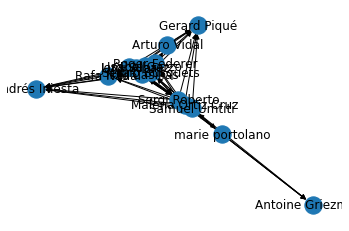

In [64]:
plt.plot()
nx.draw(dg, with_labels=True)
plt.show()

In [80]:
list(nx.connected_components(g))

[{'Iker Casillas',
  'Isabel Garzo',
  'Jordi Alba',
  'Luis Suarez',
  'Malena Ortiz Cruz',
  'Samuel Umtiti',
  'Sergi Roberto',
  'Sergio Busquets',
  'marie portolano'},
 {'Andrés Iniesta'},
 {'Arturo Vidal'},
 {'Rafa Nadal', 'Roger Federer'},
 {'Gerard Piqué'},
 {'Antoine Griezmann'}]

In [10]:
# api.GetSearch(raw_query="screen_name=fundacionmessi")
len(api.GetFriends(2917808716))

100

In [36]:
api.GetFriendIDs(2917808716)[0]

95257207

In [71]:
with open('./graph', 'wb') as f:
    pickle.dump(g, f)

with open('./directed_graph', 'wb') as f:
    pickle.dump(dg, f)

In [4]:
with open('./graph', 'rb') as f:
    new_g = pickle.load(f)

with open('./directed_graph', 'rb') as f:
    new_dg = pickle.load(f)

In [78]:
%matplotlib qt
plt.plot()
nx.draw(new_g, with_labels=True)
plt.show()